<a href="https://colab.research.google.com/github/Antima99/Antima99/blob/main/familyguy_charector_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General procedure

The ultimate goal of the individual assignment is to train **Object Detection** model for 3 types of objects of your choice.

In general, individual assignment includes several tasks to be performed as described below.

Useful links:
- https://github.com/tensorflow/models/tree/master/research/object_detection
- https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2.md
- https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/using_your_own_dataset.md
- https://towardsdatascience.com/how-to-train-a-tensorflow-2-object-detection-model-25d4da64b817

## Collecting and annotating images

Within this task you have to choose domain of objects and collect **150-200** images containing selected objects. It is recommended to use images of "reasonable" resolution (600x600 is enough). Also it is recommended to use the same encoding for the images (e.g. JPEG). 

> **NB!** Each image should contain **at least** two different objects. Deliberately select your domain of objects so you have images with multiple objects on them.

> **NB2!** Be creative in selecting the domain and make sure your objects are not recognized by alredy available models (e.g. [objects](https://github.com/amikelive/coco-labels/blob/master/coco-labels-2014_2017.txt) from COCO dataset). 


The next step is to annotate the images (draw bounding boxes around the objects) using special utilities such as  [labelImg](https://github.com/tzutalin/labelImg). Follow instruction for your platform to install it.

As a result of this task you should have a list of images and a list of XML files with annotations.

> It is worth to mention that this task is performed on your **local computers**, not  in Colab.




## Organizing the files

File organization peculiarities are not covered in this notebook, just keep in mind following aspects:

* Image annotation process is performed on your **local / class computer**.
* Colab is running in cloud **virtual machine** with initially "empty" file sistem and has lifespan **limit** of 12 hours.
* Google Drive can be used as a **permanent** storage accessible from both local computers and Colab VM.

Sinchronization between `Local files <==> Google Drive <==> Colab VM` and tools used for it is **up to you**.

This notebook assumes the following directory structure available in Google Drive:

- *(root)* **/Colab Notebooks/ML/**
  - **Assignment/** - config and binary files
   - **images/** - list of images
   - **annotations/** - list of XML files 
   - **model/** - training results



## Binary dataset preparation

When images are collected and annotated they have to be converted into binary dataset suiteble for training process.

The conversion itself is straight forward (running the script), but it is **prone to failures** due to peculiarities of your images, annotations and file structure.

Points worth to check during debugging:
* Are image and annotation files available in Colab VM?
* Is structure of directories matches the one you had during annotation process?
* Is your image encoding matches the expected by the script?
* etc...

Reading actual error messages can help in debugging. :)

As a result of this task your should have binary file (dataset), which can be stored in Google drive for later use.

##  Model training 

Object detection models are **very** complex and training them from the scratch can take months and require milions of images in datasets.

However already pre-trained models can be used as a "starting base" for fine-training on smaller datasets.

This task implies selection of pre-trained model, its configuration for fine-tuned training onto your binary dataset and actual training.

- [List](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md) of models pre-traned on COCO dataset.
- **label_map.pbtxt** - lists object labels (classes) and their IDs used during the training.
- **pipeline.config** - describes training configuration. Main points of interest are the path to dataset and label map.

The training process is mostly automated assuming that all preparation steps are done correctly. In case of errors individual debugging is needed. Most common failure reasons are missing files or wrong configuration. Refer to the detains of your selected base model (e.g. some models work only with given image sizes, etc).

When model training is complete (or interrupted early) the resutls should be exported and stored in permanent storage (e.g. Google Drive) for later use.

## Running the model

In order to demonstrate your model (the result of the assignment) trained model should be loaded into Colab VM. 
After that it can be used to detect objects on images interactivelly selected by audience during your presentation.

This process is mostly automated.

# Evironment installation

Before you start working with Object Detection models additional libraries and utilities has to be installed to Colab virtual machine.

> **NB!** This step should be performed **every time** you start Colab environment.

In [3]:
# upgrade PIP package manager
!python -m pip install --upgrade pip

     |████████████████████████████████| 1.7 MB 12.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [4]:
# get code needed for object detection 
!rm -rf ./models/
!git clone --depth=1 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 3159, done.
remote: Counting objects: 100% (3159/3159), done.
remote: Compressing objects: 100% (2689/2689), done.
remote: Total 3159 (delta 810), reused 1325 (delta 426), pack-reused 0
Receiving objects: 100% (3159/3159), 33.40 MiB | 21.50 MiB/s, done.
Resolving deltas: 100% (810/810), done.


In [5]:
# compile and install libraries 
!cd models/research/ \
  && protoc object_detection/protos/*.proto --python_out=. \
  && cp object_detection/packages/tf2/setup.py . \
  && python -m pip install --use-feature=2020-resolver .

Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 9.9 MB 24.5 MB/s            
     |████████████████████████████████| 352 kB 53.3 MB/s            
     |████████████████████████████████| 1.8 MB 47.4 MB/s            
     |████████████████████████████████| 23.1 MB 43.7 MB/s            
     |████████████████████████████████| 47.7 MB 1.8 MB/s             
     |████████████████████████████████| 596 kB 49.8 MB/s            
     |████████████████████████████████| 99 kB 9.6 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 4.9 MB 47.0 MB/s            
     |████████████████████████████████| 213 kB 53.2 MB/s            
     |████████████████████████████████| 1.1 MB 46.3 MB/s            
     |████████████████████████████████| 90 kB 11.5 MB/s            
     |████████████████████████████████| 43 kB 1.9 MB/s             
  Preparing me

In [6]:
# test installation
!python models/research/object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-01-07 05:35:23.700523: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0107 05:35:24.112790 140083999426432 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 2.97s
I0107 05:35:24.432221 140083999426432 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 2.97s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.65s
I0107 05:35:25.079489 140083999426432 test

# Mounting Google Drive

Google Drive can be used to download images and annotations, to upload binary dataset, to upload trained model, to later download model for demonstration, etc.

In order to access your Google Drive from Colab VM it should be **mounted** to local VM file system. 

Mounted directory works similar to network shares: files can be transfered between `local` and `remote` directries, however running training procedure directly on `remote` files is **not** the best idea.

> **NB!** Directory structure and sinchorization between `Colab VM <--> Google Drive` is up to you.

> **NB2!** Mounted directory works similar to "real" directory, thus deleting files from it will result in deleted files in Google Drive. **Be careful!** 

This notebook assumes that `remote` Google Drive files are mounted into `/GDrive` folder.

In [7]:
from google.colab import drive
drive.mount('/GDrive')

Mounted at /GDrive


In [8]:
# list files
!ls -l "/GDrive/My Drive/Colab Notebooks/ML/Assignment"

total 8252
drwx------ 2 root root    4096 Dec 30 13:46 annotations
-rw------- 1 root root 8432226 Jan  6 16:38 dataset.bin
drwx------ 2 root root    4096 Dec 30 13:46 images
-rw------- 1 root root     113 Dec 30 14:12 label_map.pbtxt
drwx------ 2 root root    4096 Dec 30 14:17 model
-rw------- 1 root root    4569 Jan  6 00:03 pipeline.config


# Creating binary dataset
In order to train Object detection model a dataset should be converted to special binary format.

First, images and annotations should be copies from Google Drive to local file system.

In [10]:
!rsync -ah --info=progress2 "/GDrive/My Drive/Colab Notebooks/ML/Assignment" /content/

         17.32M 100%  362.94kB/s    0:00:46 (xfr#271, to-chk=0/275)


Then annotation XML files should be processed one by one and saved into binary records.

The script below finds all annotation files (`*.xml`), loops through them extracting object definitions and saves as binary data  structure.

> Change **class names** to ones used in your annotations.

In [11]:
import glob
import numpy as np
import tensorflow as tf
from object_detection.utils import dataset_util
import io
import PIL.Image
import xml.etree.ElementTree as xml

class_dict = { "peter": 1, "Lois": 2, "Stewie":3 }

files = glob.glob('/content/Assignment/annotations/*.xml')
print("Found %d annotation files" % len(files))

# Helper function to convert XML annotation to binary example
def xml_to_tf_example(root):
    img_path = '/content/Assignment/' + root.findtext('folder') +'/'+ root.findtext('filename')

    with tf.io.gfile.GFile(img_path, 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = PIL.Image.open(encoded_jpg_io)
    if image.format != 'JPEG':
        raise ValueError('Image format not JPEG: '+ img_path)

    width = int(root.findtext('size/width'))
    height = int(root.findtext('size/height'))

    xmin = []
    ymin = []
    xmax = []
    ymax = []
    classes = []
    classes_text = []
    truncated = []
    difficult = []
    for obj in root.findall('object'):
        xmin.append(float(obj.findtext('bndbox/xmin')) / width)
        ymin.append(float(obj.findtext('bndbox/ymin')) / height)
        xmax.append(float(obj.findtext('bndbox/xmax')) / width)
        ymax.append(float(obj.findtext('bndbox/ymax')) / height)
        classes_text.append(obj.findtext('name').encode('utf8'))
        classes.append(class_dict[obj.findtext('name')]) 
        truncated.append(int(obj.findtext('truncated')))
        difficult.append(int(obj.findtext('difficult')))

    example = tf.train.Example(
        features=tf.train.Features(
            feature={
                'image/height': dataset_util.int64_feature(height),
                'image/width': dataset_util.int64_feature(width),
                'image/encoded': dataset_util.bytes_feature(encoded_jpg),
                'image/format': dataset_util.bytes_feature(b'jpeg'),
                'image/object/bbox/xmin': dataset_util.float_list_feature(xmin),
                'image/object/bbox/xmax': dataset_util.float_list_feature(xmax),
                'image/object/bbox/ymin': dataset_util.float_list_feature(ymin),
                'image/object/bbox/ymax': dataset_util.float_list_feature(ymax),
                'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
                'image/object/class/label': dataset_util.int64_list_feature(classes),
                'image/object/difficult': dataset_util.int64_list_feature(difficult),
                'image/object/truncated': dataset_util.int64_list_feature(truncated),
            }))
    return example

total_bytes = 0
writer = tf.io.TFRecordWriter('/content/Assignment/dataset.bin')

for file in files:
  root = xml.parse(file)
  example = xml_to_tf_example(root)
  total_bytes += example.ByteSize()
  writer.write(example.SerializeToString())

writer.close()

print("Wrote %d KB to dataset" % (total_bytes/1024))


Found 130 annotation files
Wrote 8232 KB to dataset


Now when binary dataset is created it can be uploaded to Google Drive for later use.

In [12]:
cp -v /content/Assignment/dataset.bin "/GDrive/My Drive/Colab Notebooks/ML/Assignment/"

'/content/Assignment/dataset.bin' -> '/GDrive/My Drive/Colab Notebooks/ML/Assignment/dataset.bin'


# Training object detection model

First, we have to download pre-trained model archive and extract it to local directory (`./base_model` in this case).

As an examle this notebook uses `SSD MobileNet V2 FPNLite 320x320` model, which is designed for decent image resolutions and still has reasonable performance.

In general, any model from  this [list](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md) (models pre-traned on COCO dataset) or any other can be used.

In [13]:
!mkdir -p /content/base_model \
  && curl http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz \
    | tar xzv -C /content/base_model/ --strip-components=1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
 40 19.5M   40 8208k    0     0  7231k      0  0:00:02  0:00:01  0:00:01 7231kssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
100 19.5M  100 19.5M    0     0  14.1M      0

Before the training can be started, we have to prepare several config files as described below.

## Label map

Label map is straight forward: it is text file with class names and their IDs. The easeast way to prepare it is to [download](https://github.com/tensorflow/models/blob/master/research/object_detection/data/pascal_label_map.pbtxt) an example of such file, change it according to your needs and store on Google Drive.

Now it can be copied to Colab VM as follows (file name is `label_map.pbtxt` in this example):

In [14]:
!cp -v "/GDrive/My Drive/Colab Notebooks/ML/Assignment/label_map.pbtxt" /content/Assignment/

'/GDrive/My Drive/Colab Notebooks/ML/Assignment/label_map.pbtxt' -> '/content/Assignment/label_map.pbtxt'


## Pipeline config 

Training pipeline config is, again, text file with bunch of options for training procedure.
Similar to label map, the easear way is to use an **example config** provided with downloaded model (`base_model/pipeline.config`), store it to Google Drive, change according to your needs and then load back to Colab VM.

In [ ]:
# upload example file to Google Drive
# NB! Run this only when you need an example config file, otherwise it might rewrite your modified file

!cp -v /content/base_model/pipeline.config "/GDrive/My Drive/Colab Notebooks/ML/Assignment/"

In [15]:
# download modified config from Google Drive
!cp -v "/GDrive/My Drive/Colab Notebooks/ML/Assignment/pipeline.config" /content/Assignment/

'/GDrive/My Drive/Colab Notebooks/ML/Assignment/pipeline.config' -> '/content/Assignment/pipeline.config'


The parameters within `pipeline.config` file are model dependent. 

This notebook considers `SSD MobileNet V2 FPNLite 320x320` as a base model, thus parameters to change are as follows:

* `model > ssd > num_classes` - number of object classes to detect;
* `train_config > batch_size` - number of images in batch (large numbers might lead to *Out of memory* exceptions);
* `train_config > fine_tune_checkpoint` - path to base model to start training from (prefix to checkpoint, e.g. `/content/base_model/checkpoint/ckpt-0`);
* `train_config > fine_tune_checkpoint_type` - should be **changed** to `detection`;
* `train_input_reader` - pathes to training binary dataset and label map;
* `eval_input_reader` - can be configured to the same training dataset (or separate validation dataset can be created);

> **NB!** Paths in configuration should be set in terms of Colab VM directory structure (e.g. `/content/Assignment/...`).

If you are using different base model, change its parameters accordingly.

Also the original (downloaded) base model can be substituted by "partially" trained model on your custom dataset. The procedure is similar: download model and point to it in `fine_tune_checkpoint` parameter.

In [16]:
#due to someupdates in tensorflow library we need to downgrade opencv-python-headless to version 4.1.2.30 manually.
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [17]:
#installing the needed version before training
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 62.1 MB/s            


## Training

Finally model training can be started as follows by running the script.

Training object detection model is time consuming. Exact time depends on dataset and pipeline configuration, though expect **at least 5-6 hours** for this step. 

> **NB!** Keep track on your training process and **interrupt** it if Colab VM is about to expire. Otherwise you will **loose training results**.

In [18]:
!python /content/models/research/object_detection/model_main_tf2.py \
  --pipeline_config_path=/content/Assignment/pipeline.config \
  --model_dir=/content/trained_model/ \
  --num_train_steps=10000 \
  --checkpoint_every_n=500 \
  --alsologtostderr

2022-01-07 05:42:25.494094: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0107 05:42:25.497567 140169272063872 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 10000
I0107 05:42:25.502651 140169272063872 config_util.py:552] Maybe overwriting train_steps: 10000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0107 05:42:25.502819 140169272063872 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0107 05:42:25.539320 140169272063872 deprecation.py:347] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experime

## Export

For easier use the model should be exported as stand-alone entity (without training history and detailed events).

In [19]:
!python /content/models/research/object_detection/exporter_main_v2.py \
  --trained_checkpoint_dir="/content/trained_model/" \
  --pipeline_config_path="/content/Assignment/pipeline.config" \
  --output_directory="/content/Assignment/model"

2022-01-07 10:52:54.167558: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0107 10:52:54.468963 140268769851264 deprecation.py:619] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:464: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0107 10:53:14.354221 14026876985

The exported model can be stored on Google Drive and later used as a base model for another training session or for object detection during presentation.

In [29]:
# upload exported model to Google Drive
!rsync -ah --info=progress2 /content/Assignment/model/ "/GDrive/My Drive/Colab Notebooks/ML/Assignment/model/"

        183.74M 100%  127.53MB/s    0:00:01 (xfr#16, to-chk=0/18)


# Running the model

Now the defining moment: running the model to detect objects on provided image.

In [21]:
# download the model from Google Drive
!rsync -ah --info=progress2 "/GDrive/My Drive/Colab Notebooks/ML/Assignment/model/" /content/Assignment/model/

              0   0%    0.00kB/s    0:00:00 (xfr#0, to-chk=0/12)


In [22]:
# load the model into memory
import tensorflow as tf
model = tf.saved_model.load('/content/Assignment/model/saved_model') 
detect_fn = model.signatures['serving_default']

In [23]:
# download and parse label map
from object_detection.utils import label_map_util
!cp -v "/GDrive/My Drive/Colab Notebooks/ML/Assignment/label_map.pbtxt" /content/Assignment/

category_index = label_map_util.create_category_index_from_labelmap('/content/Assignment/label_map.pbtxt')

'/GDrive/My Drive/Colab Notebooks/ML/Assignment/label_map.pbtxt' -> '/content/Assignment/label_map.pbtxt'


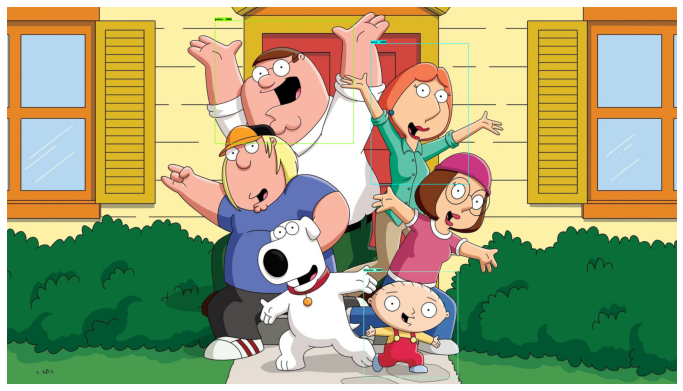

In [26]:
# run the model for provided URL
%matplotlib inline
import numpy as np
import PIL.Image
import io
import matplotlib.pyplot as plt
import requests
from object_detection.utils import visualization_utils

# loading image by URL
response = requests.get('https://i.kym-cdn.com/entries/icons/facebook/000/010/003/keyart_s17_v2.jpg')
img = np.array(PIL.Image.open(io.BytesIO(response.content)))
img_tensor =  tf.convert_to_tensor(np.expand_dims(img, 0), dtype=tf.uint8)
detections = detect_fn(img_tensor)

# drawing detection frames
visualization_utils.visualize_boxes_and_labels_on_image_array(
      img,
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      line_thickness=2,
      min_score_thresh=0.8)


plt.figure(figsize=(12,16))
plt.imshow(img)
plt.axis('off');


## Another variant of loading and running the model

In [27]:
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils
from object_detection.builders import model_builder

configs = config_util.get_configs_from_pipeline_file('/content/Assignment/model/pipeline.config')
detection_model = model_builder.build(configs['model'], is_training=False)
ckpt = tf.train.Checkpoint(model=detection_model)
ckpt.restore('/content/Assignment/model/checkpoint/ckpt-0')

# @tf.function()
def detect_fn(image):
  image, shapes = detection_model.preprocess(image)
  prediction = detection_model.predict(image, shapes)
  detections = model.postprocess(prediction, shapes)

  return detections, prediction, tf.reshape(shapes, [-1])

In [ ]:
%matplotlib inline
import numpy as np
import PIL.Image
import io
import matplotlib.pyplot as plt
import requests

# loading image by URL
response = requests.get('https://i.kym-cdn.com/entries/icons/facebook/000/010/003/keyart_s17_v2.jpg')
img = np.array(PIL.Image.open(io.BytesIO(response.content)))

img_tensor =  tf.convert_to_tensor(np.expand_dims(img, 0), dtype=tf.float32)
detections, predictions, shapes = detect_fn(img_tensor)

# drawing detection frames
visualization_utils.visualize_boxes_and_labels_on_image_array(
      img,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + 1).astype(np.int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      line_thickness=2)


plt.figure(figsize=(12,16))
plt.imshow(img)
plt.axis('off')
# plt.show()
